# Nesses exercícios vamos Analisar o DataSet dos atributos básicos dos Pokémons:

![gif](https://media.giphy.com/media/3oEduV4SOS9mmmIOkw/giphy.gif)

In [2]:
# Primeiro, import das bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Coloque aqui qlqr outra biblioteca que achar necessário

In [3]:
# Leia o arquivo em um DataFrame!
df = pd.read_csv(r'C:\Users\rodribia\GitHub\My_Projects\1 Aulas Data Science\Data Sets/Poke.csv')

In [4]:
# Inpecione seu cabeçalho
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [18]:
# Quantas dimensões temos nesse Dataframe?
print(df.shape)

(800, 13)


In [5]:
# Colete as informações básicas do Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [16]:
# Mostre todas as colunas presentes no DataFrame
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

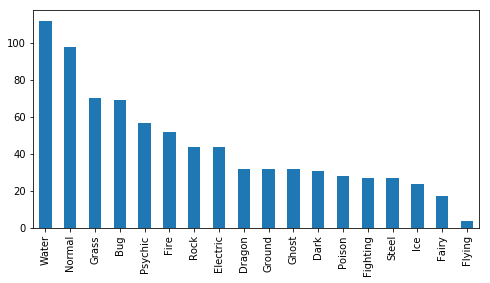

In [21]:
# Crie um gráfico de quantos pokémons existem por tipos (considerando apenas o tipo principal)
# da melhor forma que achar possível!
# Observação, tipo principal = Type 1

plt.figure(figsize=(8,4))
df['Type 1'].value_counts().plot(kind='bar')

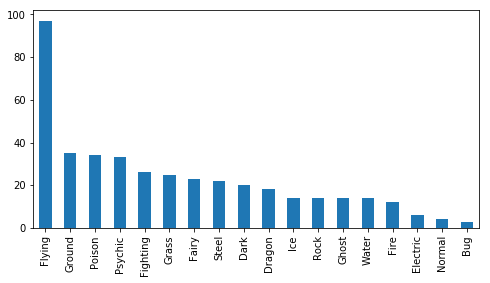

In [20]:
# Crie um gráfico de quantos pokémons existem por tipos (considerando apenas o tipo secundário)
# da melhor forma que achar possível!
# Observação, tipo secundário = Type 2

plt.figure(figsize=(8,4))
df['Type 2'].value_counts().plot(kind='bar')

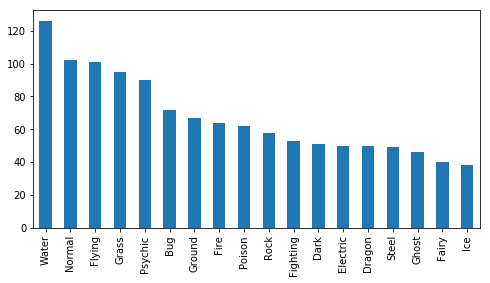

In [86]:
# Agora faça a junção dos dois acima! Crie um gráfico que considere ambos (tipo 1 e 2) e conte os mais freq.

tipos1 = list(df['Type 1'])
tipos2 = list(df['Type 2'].dropna())
total_tipos = tipos1 + tipos2
plt.figure(figsize=(8,4))
pd.DataFrame(total_tipos)[0].value_counts().plot(kind='bar');

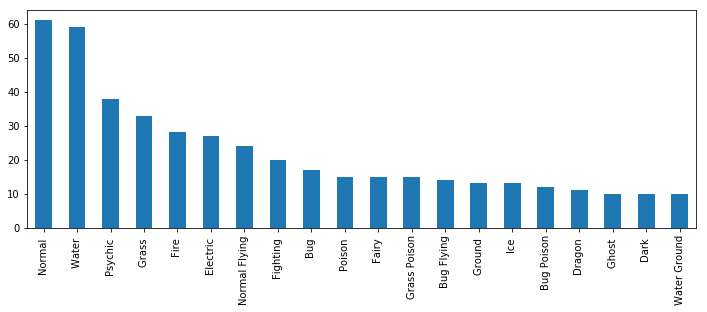

In [104]:
# E quais sao as combinações de tipos mais comuns? (plote apenas os 20 mais freq.)

df['Type 1 e 2'] = df['Type 1'] + ' ' + df['Type 2'].fillna('')
plt.figure(figsize=(12,4))
df['Type 1 e 2'].value_counts()[:20].plot(kind='bar')

In [116]:
# E quais sao as combinações de tipos únicas? (que só aparecem em 1 pokémon)

df['Type 1 e 2'] = df['Type 1'] + ' ' + df['Type 2'].fillna('')
df['Type 1 e 2'].value_counts()[115:]

Ice Ghost          1
Fire Steel         1
Ground Fire        1
Fighting Flying    1
Poison Water       1
Ghost Dark         1
Electric Water     1
Dragon Electric    1
Fire Water         1
Psychic Grass      1
Water Steel        1
Dragon Fairy       1
Electric Grass     1
Electric Ghost     1
Psychic Fire       1
Dragon Fire        1
Electric Fire      1
Bug Water          1
Rock Fighting      1
Steel Fighting     1
Steel Flying       1
Bug Ghost          1
Normal Water       1
Ground Steel       1
Electric Fairy     1
Fighting Dark      1
Fire Rock          1
Psychic Ghost      1
Poison Dragon      1
Electric Dragon    1
Psychic Dark       1
Normal Ground      1
Grass Ground       1
Fire Dragon        1
Electric Ice       1
Steel Dragon       1
Poison Bug         1
Grass Dragon       1
Ground Electric    1
Name: Type 1 e 2, dtype: int64

In [140]:
# Dentro do universo pokémon, existem diversos atributos que determinam a "força" do monstrinho
# Criamos uma lista das colunas que representam eles para facilitar suas analises:

lista_atributos = ['HP', 'Attack', 'Defense',
                       'Sp. Atk', 'Sp. Def', 'Speed']

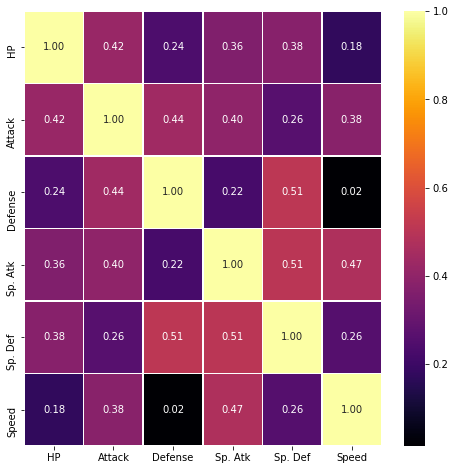

In [145]:
# Plote uma matriz de correlação para enxergarmos quais atributos tem maior correlação com quais outros atributos.

plt.figure(figsize=(8, 8))
sns.heatmap(df[lista_atributos].corr(), annot=True, linewidths=.5, fmt= '.2f', cmap='inferno');

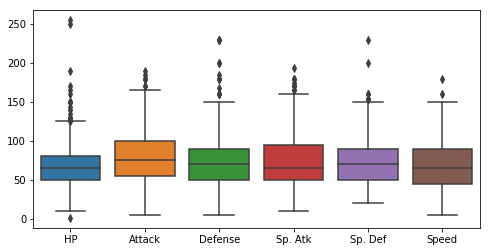

In [168]:
# Como estão distribuidos os valores de acordo com os atributos?
plt.figure(figsize=(8,4))
sns.boxplot(data=df[lista_atributos]);

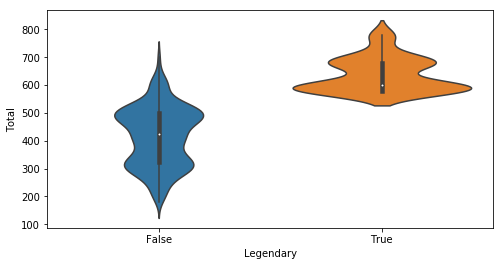

In [169]:
# E talvez, no total, os lendários são mesmo mais fortes?
plt.figure(figsize=(8,4))
sns.violinplot(y='Total', x='Legendary', data=df);

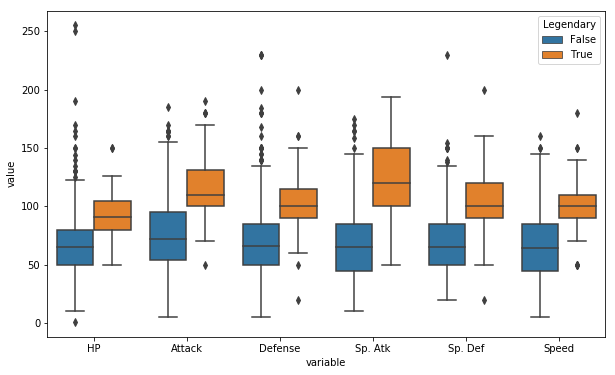

In [171]:
# E no restante dos atributos?
plt.figure(figsize=(10,6))
melted = pd.melt(frame=df,id_vars = 'Name', value_vars= lista_atributos)
melted = melted.merge(df[['Name', 'Legendary']], on='Name')
sns.boxplot(x='variable', y='value', data=melted, hue='Legendary')

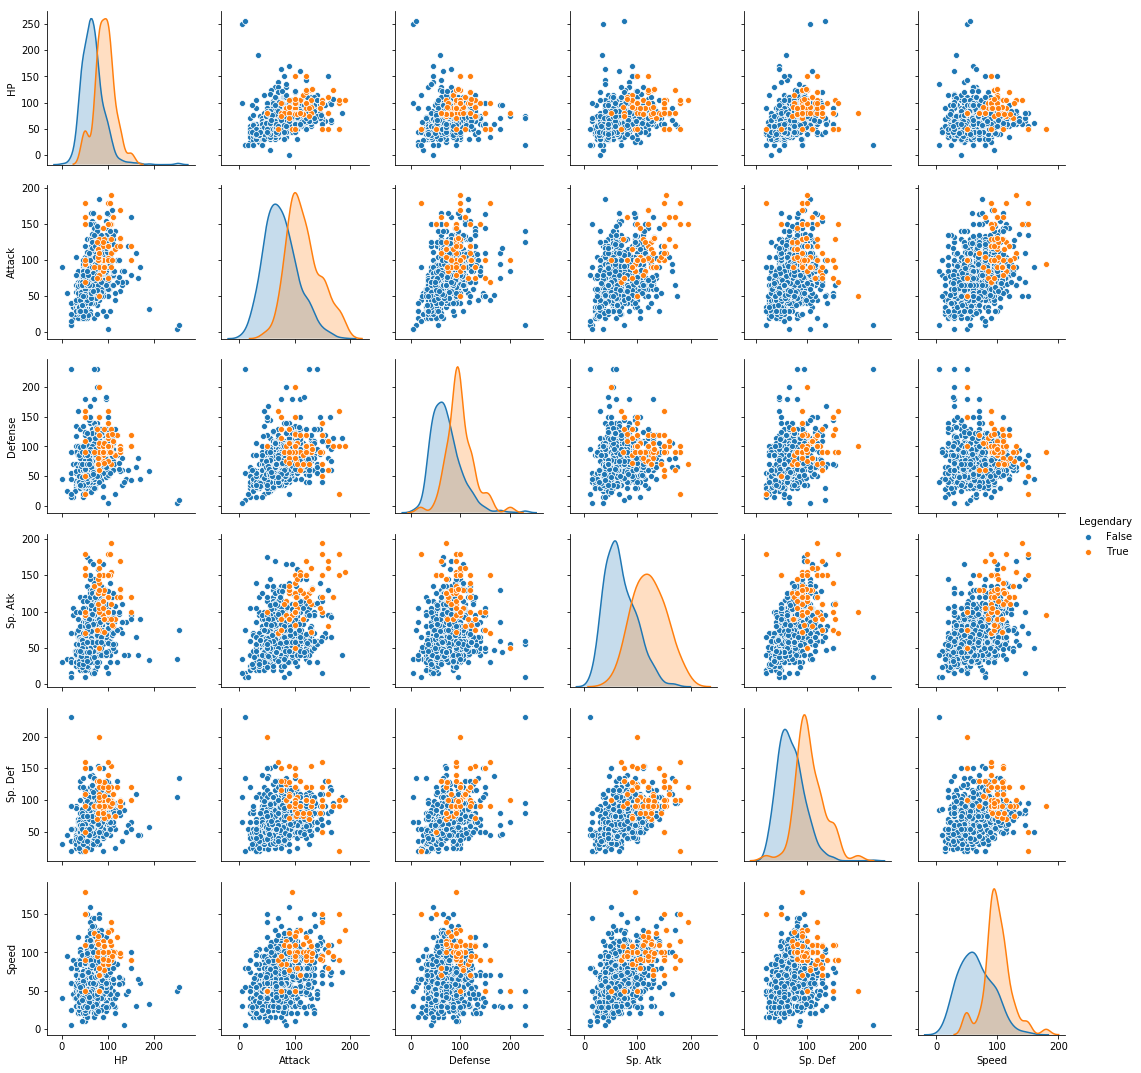

In [176]:
# E o cruzamento de todos esses atributos Vs. todos esses atributos separador por Lendário ou não?
sns.pairplot(df, vars=lista_atributos, hue='Legendary');

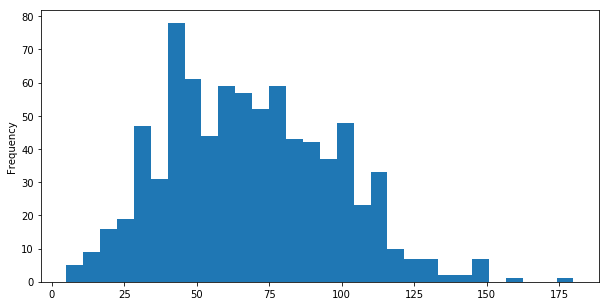

In [253]:
# Vamos supor que eu queira um pokémon rápido para suprir uma lacuna no meu time
# Primeiro quero ver a distribuição da variável speed

df.Speed.plot(kind = 'hist',bins = 30 ,figsize = (10,5));

In [257]:
# Eu quero um com Speed >= 150, quais são eles?
df[df['Speed']>=150]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1 e 2
71,65,AlakazamMega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False,Psychic
154,142,AerodactylMega Aerodactyl,Rock,Flying,615,80,135,85,70,95,150,1,False,Rock Flying
315,291,Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False,Bug Flying
428,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True,Psychic
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True,Psychic
431,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True,Psychic


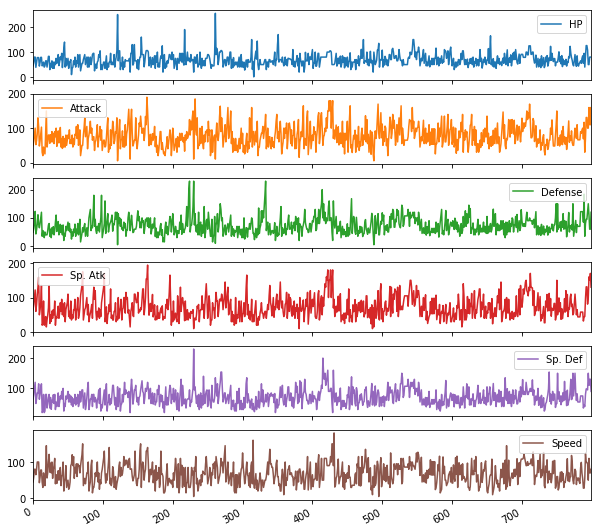

In [184]:
# Voltando aos atributos, como eles variam ao longo dos novos pokémons?
df[lista_atributos].plot(subplots = True, figsize=(10,10));

In [193]:
# E por geração, será que em média os atributos são maiores ou menores conforme novos jogos são lançados?
df.groupby('Generation').mean().T

Generation,1,2,3,4,5,6
#,75.819277,202.283019,321.96875,442.446281,574.272727,688.012195
Total,426.813253,418.283019,436.22500,459.016529,434.987879,436.378049
HP,65.819277,71.207547,66.54375,73.082645,71.787879,68.268293
Attack,76.638554,72.028302,81.62500,82.867769,82.066667,75.804878
Defense,70.861446,73.386792,74.10000,78.132231,72.327273,76.682927
Sp. Atk,71.819277,65.943396,75.80625,76.404959,71.987879,74.292683
Sp. Def,69.090361,73.905660,71.22500,77.190083,68.739394,74.890244
Speed,72.584337,61.811321,66.92500,71.338843,68.078788,66.439024
Legendary,0.036145,0.047170,0.11250,0.107438,0.090909,0.097561


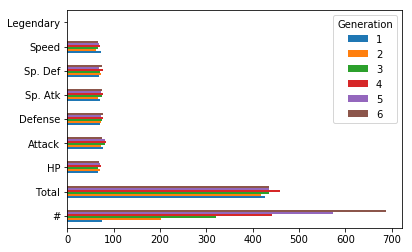

In [196]:
# Se plotarmos direto, fica difícil de visualizar:
df.groupby('Generation').mean().T.plot(kind='barh');

In [204]:
# então vamos manipular um pouco e separar os valores de acordo com a variação de uma média
# 1° Criamos uma coluna chamada média

group = df.groupby('Generation').mean().T
group['mean'] = group.mean(numeric_only=True, axis=1)
group.drop('#', axis=0, inplace=True)
group

Generation,1,2,3,4,5,6,mean
Total,426.813253,418.283019,436.22500,459.016529,434.987879,436.378049,435.283955
HP,65.819277,71.207547,66.54375,73.082645,71.787879,68.268293,69.451565
Attack,76.638554,72.028302,81.62500,82.867769,82.066667,75.804878,78.505195
Defense,70.861446,73.386792,74.10000,78.132231,72.327273,76.682927,74.248445
Sp. Atk,71.819277,65.943396,75.80625,76.404959,71.987879,74.292683,72.709074
Sp. Def,69.090361,73.905660,71.22500,77.190083,68.739394,74.890244,72.506790
Speed,72.584337,61.811321,66.92500,71.338843,68.078788,66.439024,67.862886
Legendary,0.036145,0.047170,0.11250,0.107438,0.090909,0.097561,0.081954


In [210]:
# 2° trocamos o valor de cada célula pela diferença em relação a média
for col in group:
    group[col] = group[col] - group['mean']
group

Generation,1,2,3,4,5,6,mean
Total,-8.470702,-17.000936,0.941045,23.732574,-0.296076,1.094094,0.0
HP,-3.632288,1.755982,-2.907815,3.631080,2.336314,-1.183272,0.0
Attack,-1.866641,-6.476893,3.119805,4.362574,3.561472,-2.700317,0.0
Defense,-3.386999,-0.861652,-0.148445,3.883787,-1.921172,2.434482,0.0
Sp. Atk,-0.889797,-6.765678,3.097176,3.695885,-0.721195,1.583609,0.0
Sp. Def,-3.416429,1.398870,-1.281790,4.683292,-3.767396,2.383454,0.0
Speed,4.721452,-6.051565,-0.937886,3.475957,0.215902,-1.423861,0.0
Legendary,-0.045809,-0.034784,0.030546,0.025484,0.008955,0.015607,0.0


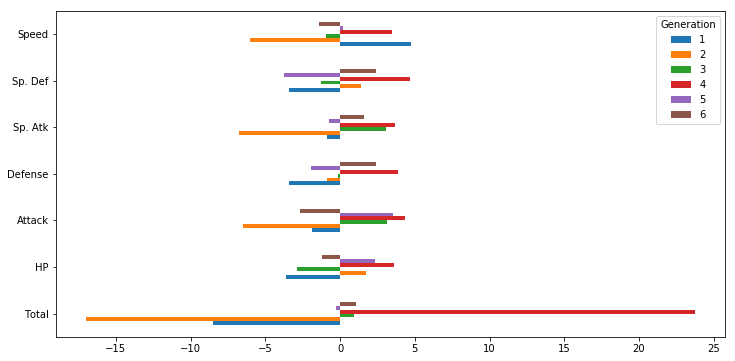

In [220]:
# 3° agora podemos fazer nosso plot, desconsiderando a coluna média criada
group.drop(['mean'], axis=1).drop('Legendary').plot(kind='barh', figsize=(12,6));

In [251]:
# Quais são os 6 Pokémons mais fortes para cada atributo?
for atributo in lista_atributos:
    print('para o atributo:', atributo)
    print('temos:')
    print('')
    print(df.sort_values(by=atributo, ascending=False)[['Name', atributo]].head(6))
    print('')
    print('')

para o atributo: HP
temos:

          Name   HP
261    Blissey  255
121    Chansey  250
217  Wobbuffet  190
351    Wailord  170
655  Alomomola  165
155    Snorlax  160


para o atributo: Attack
temos:

                        Name  Attack
163      MewtwoMega Mewtwo X     190
232  HeracrossMega Heracross     185
424    GroudonPrimal Groudon     180
426    RayquazaMega Rayquaza     180
429       DeoxysAttack Forme     180
711       KyuremBlack Kyurem     170


para o atributo: Defense
temos:

                    Name  Defense
230              Shuckle      230
224  SteelixMega Steelix      230
333    AggronMega Aggron      230
223              Steelix      200
414             Regirock      200
789              Avalugg      184


para o atributo: Sp. Atk
temos:

                      Name  Sp. Atk
164    MewtwoMega Mewtwo Y      194
422    KyogrePrimal Kyogre      180
429     DeoxysAttack Forme      180
426  RayquazaMega Rayquaza      180
71   AlakazamMega Alakazam      175
712     KyuremW

In [250]:
# E quais são os 6 Pokémons mais fortes no geral (total)?
df.sort_values(by='Total', ascending=False).head(6)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1 e 2
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True,Dragon Flying
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True,Psychic
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,Psychic Fighting
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True,Water
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True,Ground Fire
552,493,Arceus,Normal,NaN,720,120,120,120,120,120,120,4,True,Normal


# Se você conseguiu chegar até aqui, muito bom!!

![fg](https://media.giphy.com/media/dqHIRdXoGEu7S/giphy.gif)

# Você ganhou uma insígnea! Continue no seu caminho para se transformar em um Data Science Master's!!